<a href="https://colab.research.google.com/github/VemPrava/FMML_Projects_and_Labs/blob/main/Pravallika_FMML_Module_2_project_2024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Module 2: Appreciating, Interpreting and Visualizing Data
## Project

```
Coordinator: Aswin Jose
```

---

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

we wil be performing a simple Exploratory Data Anaysis for this project. We will use the methods we learned in the tutorials to have a basic understanding of the dataset. So first we will start with the heart dataset available from kaggle. the infomration about the columns of the dataset is given below:    
-age    
-sex    
-chest pain type (4 values)    
-resting blood pressure    
-serum cholestoral in mg/dl    
-fasting blood sugar > 120 mg/dl    
-resting electrocardiographic results (values 0,1,2)    
-maximum heart rate achieved    
-exercise induced angina   
-oldpeak = ST depression induced by exercise relative to rest    
-the slope of the peak exercise ST segment    
-number of major vessels (0-3) colored by flourosopy    
-:thal: 0 = normal; 1 = fixed defect; 2 = reversable defect    

Fill in the portions that says "to do"

In [2]:
from google.colab import files
uploaded1 = files.upload()

Saving heart.csv to heart.csv


In [3]:
data = pd.read_csv("heart.csv")
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
data.shape

(303, 14)

In [5]:
data.columns


Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

Data preparation

In [6]:
## we will be comparing rest of the parameters/columns present in the data with respect to precence or absece of heart disease
data['target'] = data.target.replace({1: "Disease", 0: "No_disease"})
data['sex'] = data.sex.replace({1: "Male", 0: "Female"})
data['cp'] = data.cp.replace({1: "typical_angina",
                          2: "atypical_angina",
                          3:"non-anginal pain",
                          4: "asymtomatic"})
data['exang'] = data.exang.replace({1: "Yes", 0: "No"})
data['slope'] = data.cp.replace({1: "upsloping",
                          2: "flat",
                          3:"downsloping"})
data['thal'] = data.thal.replace({1: "fixed_defect", 2: "reversable_defect", 3:"normal"})

In [9]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,Male,non-anginal pain,145,233,1,0,150,No,2.3,non-anginal pain,0,fixed_defect,Disease
1,37,Male,atypical_angina,130,250,0,1,187,No,3.5,atypical_angina,0,reversable_defect,Disease
2,41,Female,typical_angina,130,204,0,0,172,No,1.4,typical_angina,0,reversable_defect,Disease
3,56,Male,typical_angina,120,236,0,1,178,No,0.8,typical_angina,0,reversable_defect,Disease
4,57,Female,0,120,354,0,1,163,Yes,0.6,0,0,reversable_defect,Disease


First, lets look at the difference in the number of samples with and without disease using a barplot.

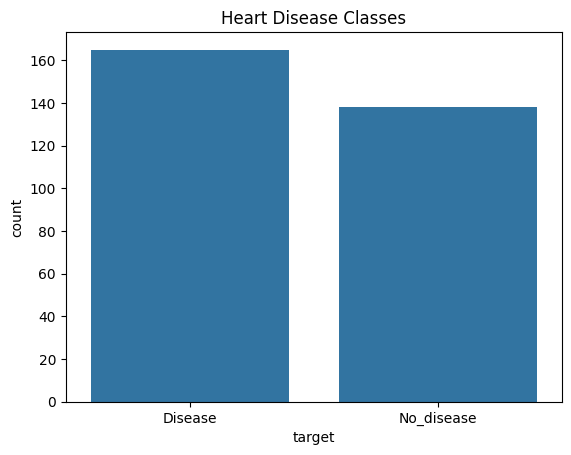

In [7]:
sns.barplot(data['target'].value_counts())
plt.title('Heart Disease Classes')
plt.show()

Text(0.5, 1.0, 'Heart Disease Classes')

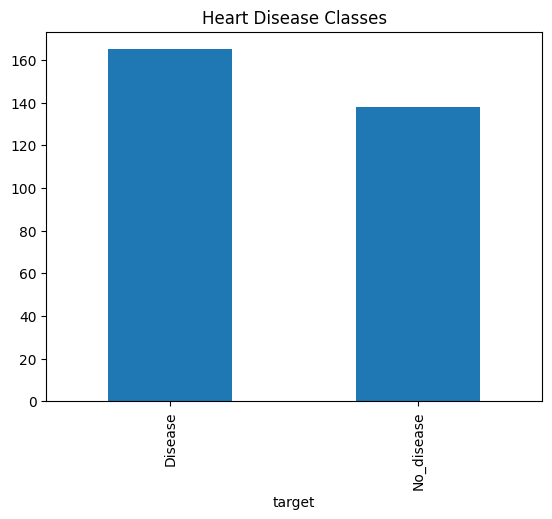

In [8]:
## we can plot the same barplots usng the pandas inbuilt plotting functions.
data['target'].value_counts().plot(kind='bar').set_title('Heart Disease Classes')

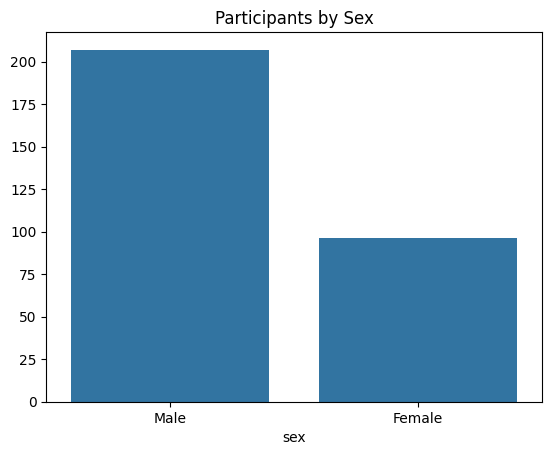

In [15]:
## Now plot a barplot indicating the the sex of the participants involved in the study, use whatever method of ploting comfortable for you
## to do
sns.barplot(x=data['sex'].value_counts().index, y=data['sex'].value_counts().values)
plt.title('Participants by Sex')
plt.show()


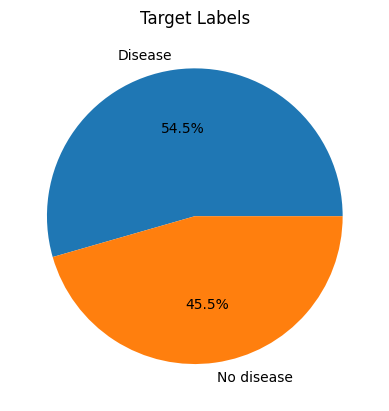

In [10]:
## pie charts can also be used to show the same infomation in a different manner
plt.pie(data['target'].value_counts(), labels=["Disease", "No disease"], autopct='%1.1f%%')
plt.title('Target Labels')
plt.show()

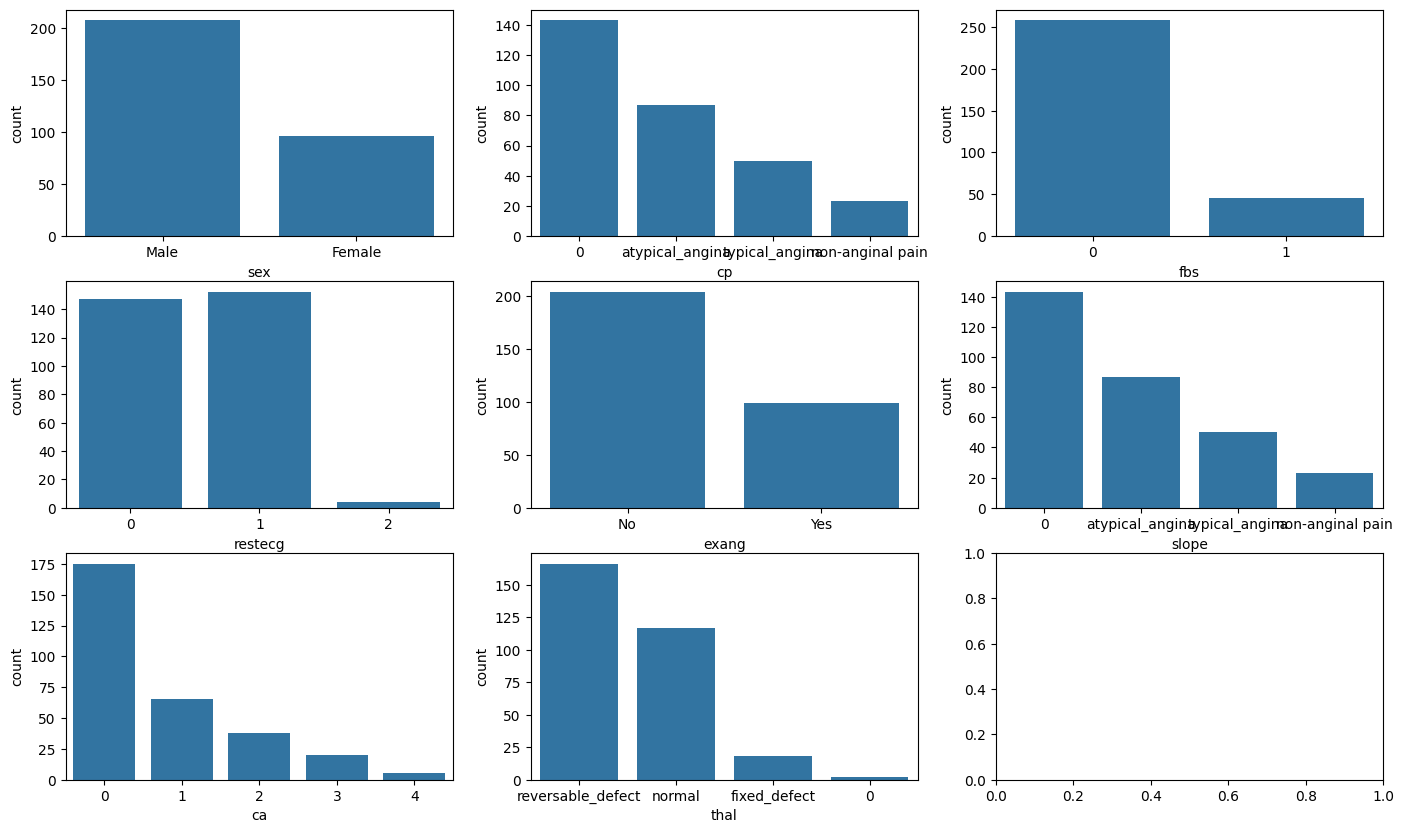

In [11]:
# next we will plot the counts of all the non-continous features present in the dataset.
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(17,10))
cat_feat = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']

for idx, feature in enumerate(cat_feat):
    ax = axes[int(idx/3), idx%3]
    sns.barplot(data[feature].value_counts(), ax=ax)

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


Text(0.5, 1.0, 'Disease classes according to Chest Pain')

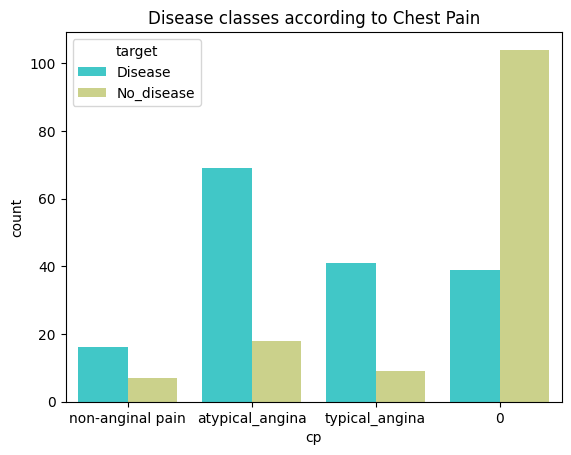

In [16]:
##  now lets play with 2 vaiables in dataset. Lets see if chest pain translates to the presence of desease in most cases...
sns.countplot(x='cp', hue='target', data=data, palette='rainbow').set_title('Disease classes according to Chest Pain')

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

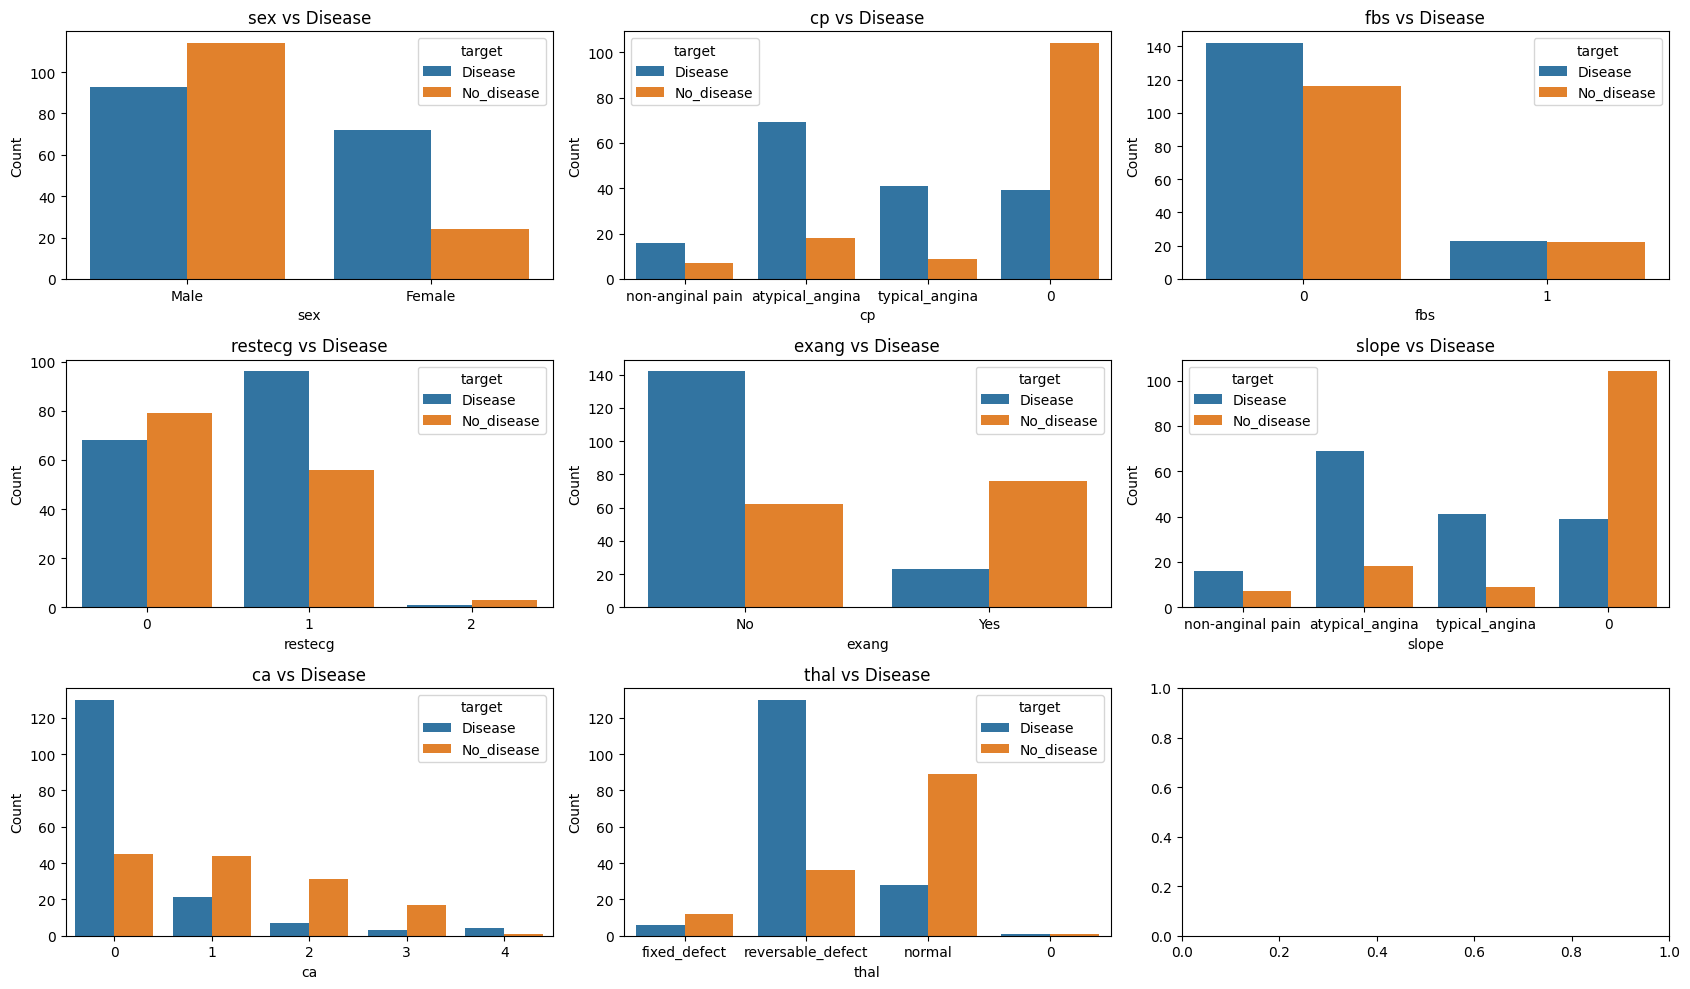

In [20]:
# now lets visualise count of all vairables w.r.t the presence of disease togather:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(17,10))
cat_feat = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']

for idx, feature in enumerate(cat_feat):
    ax = axes[int(idx/3), idx%3]
    ## to do
    sns.countplot(x=feature, hue='target', data=data, ax=ax)
    ax.set_title(f'{feature} vs Disease')
    ax.set_xlabel(f'{feature}')
    ax.set_ylabel('Count')

plt.tight_layout()
plt.show()


In [21]:
# Visualising the distribution of the continous variables

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

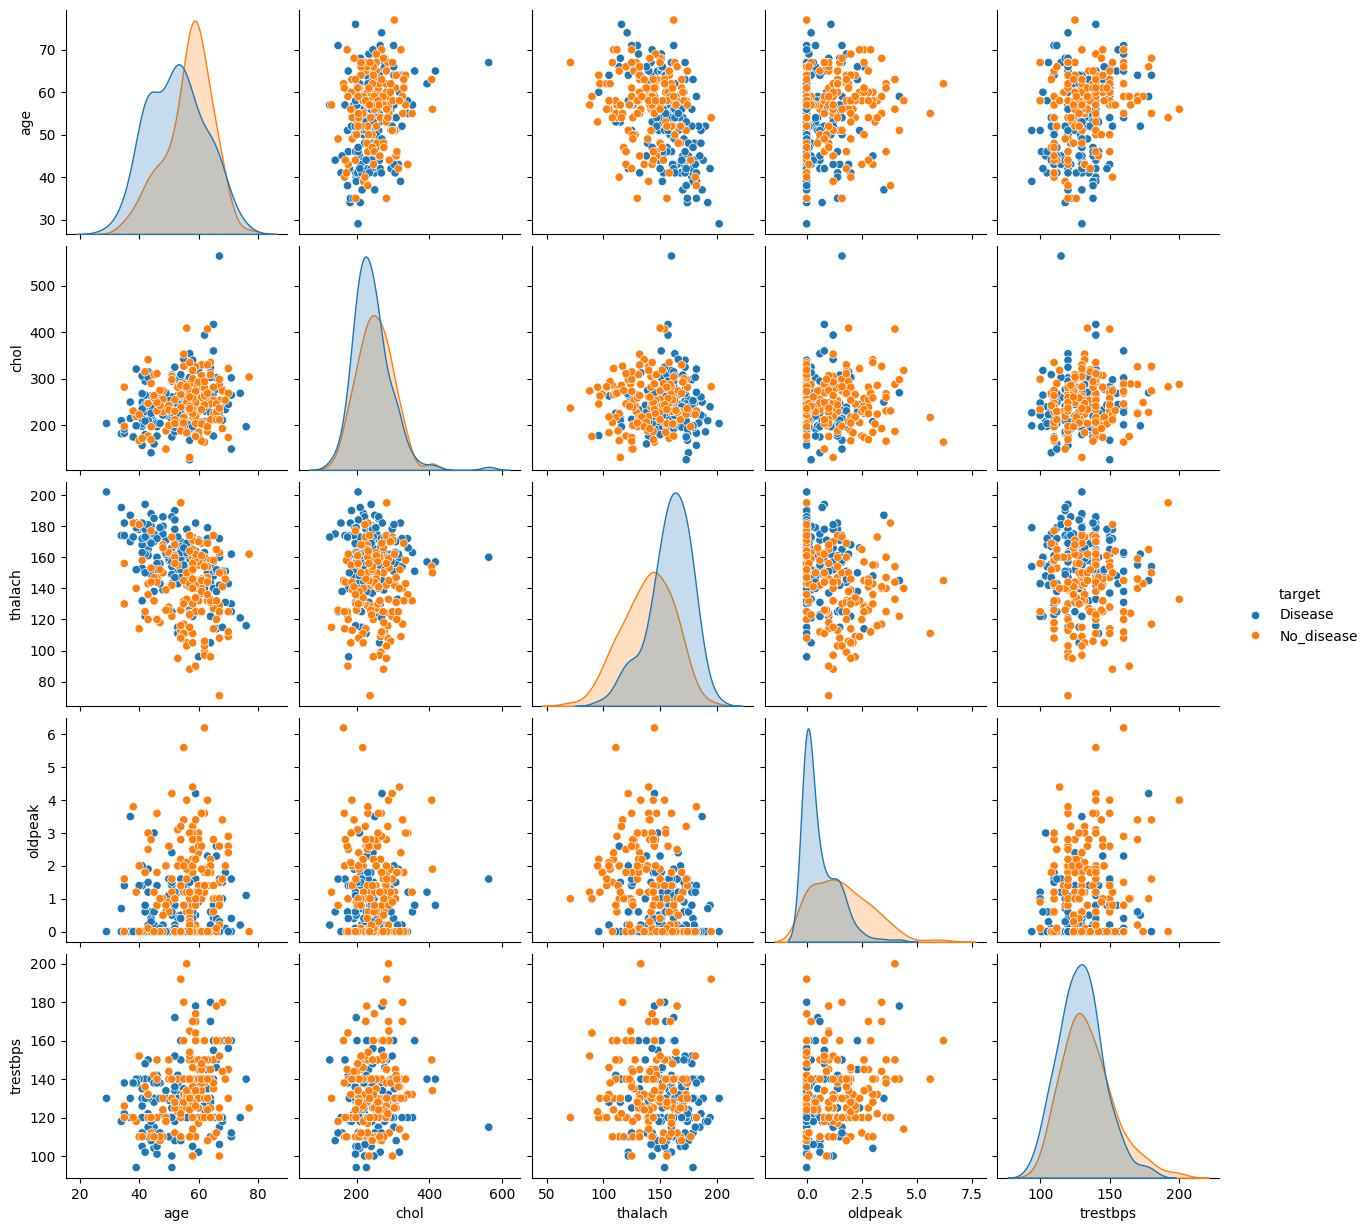

In [22]:
## pair plots can automoaticaly be used to viwe the pairwise relationship between all the  feature that we selected
continous_features = ['age', 'chol', 'thalach', 'oldpeak','trestbps']
sns.pairplot(data[continous_features + ['target']], hue='target')

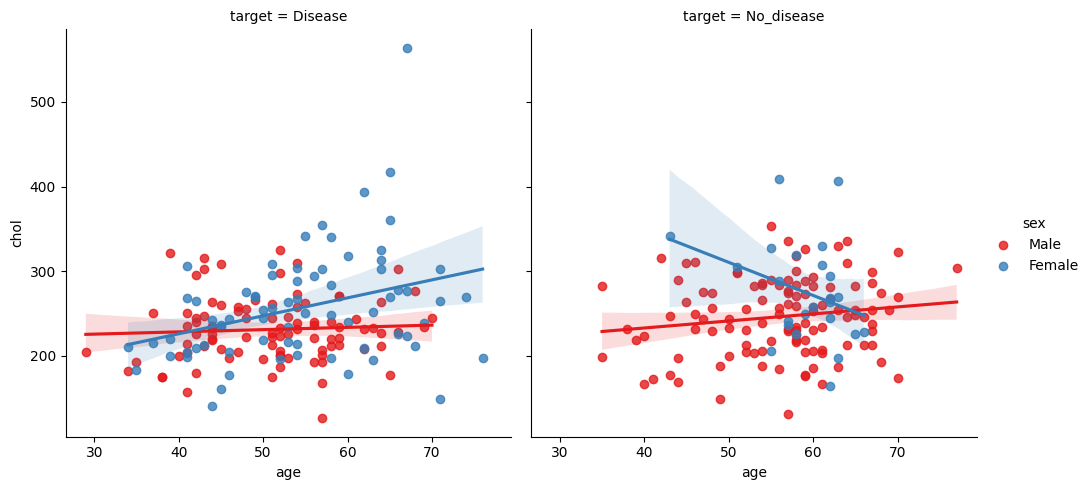

In [23]:
# Now lets try to understand the relationship between age and chol in each of the target based on sex.
sns.lmplot(x="age", y="chol", hue="sex", col="target",
           palette="Set1",
           data=data)
plt.show()

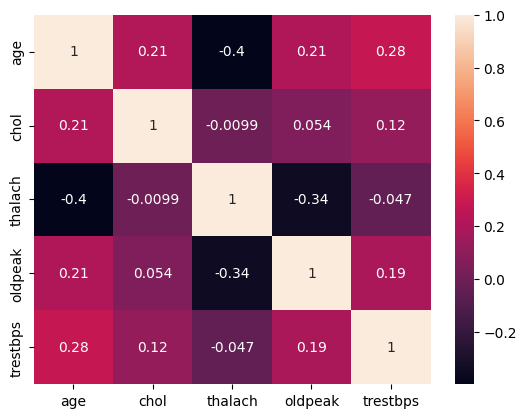

In [24]:
numeric_data = data[continous_features]

# Compute the correlation matrix
corr_matrix = numeric_data.corr()
sns.heatmap(corr_matrix, annot=True)


plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.

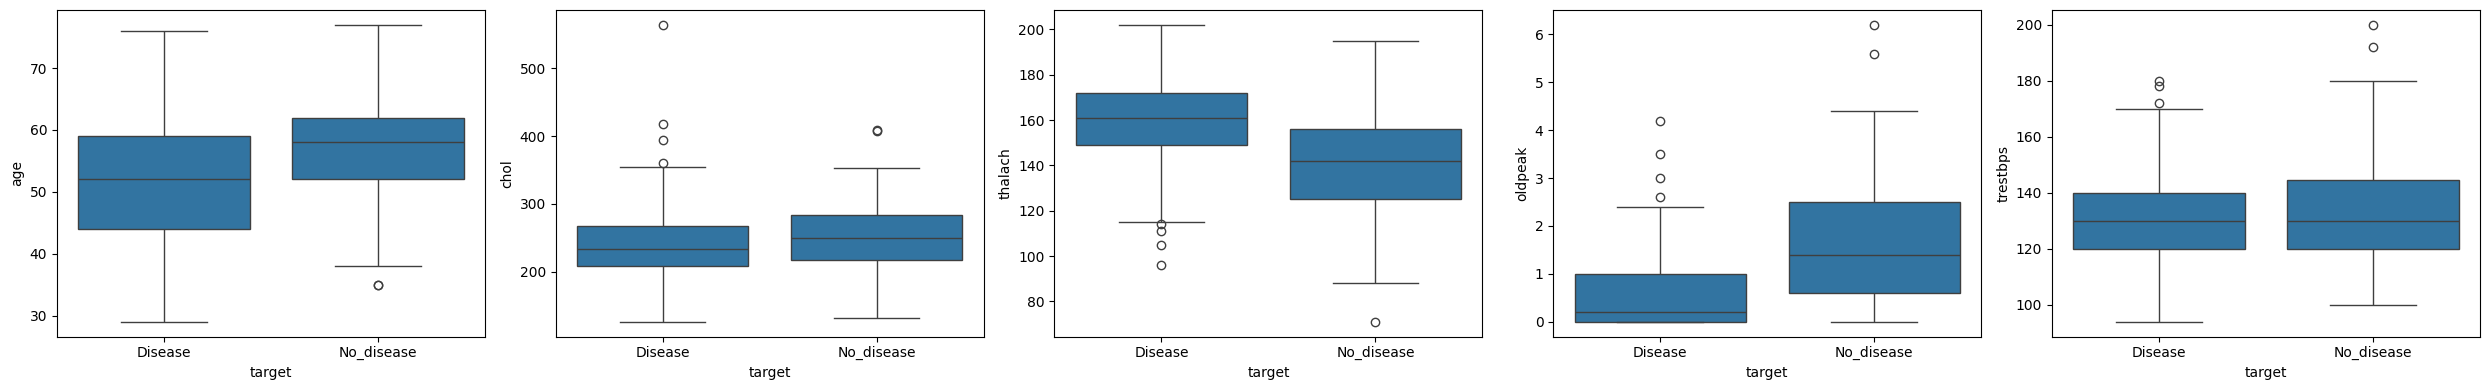

In [25]:
fig, axes = plt.subplots(1, len(continous_features), figsize=(25, 4), sharex=False, sharey=False)

for idx, feature in enumerate(continous_features):
    sns.boxplot(x='target', y=feature, data=data, ax=axes[idx])
plt.tight_layout()
plt.show()

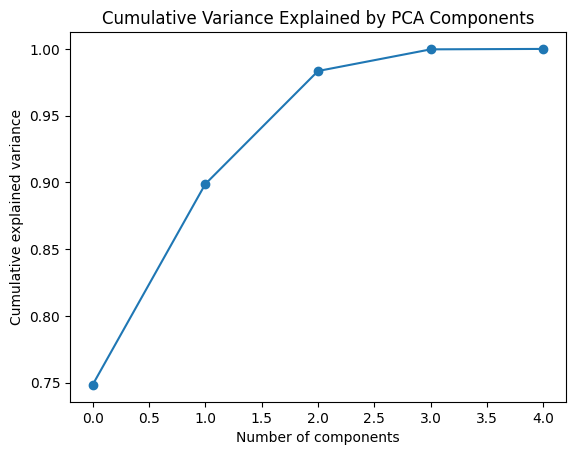

In [26]:
# prompt: plot the cumulative variace of pca for all the possibel pronviopal components
## to do
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np
pca = PCA()
pca.fit(numeric_data)
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.title('Cumulative Variance Explained by PCA Components')
plt.show()


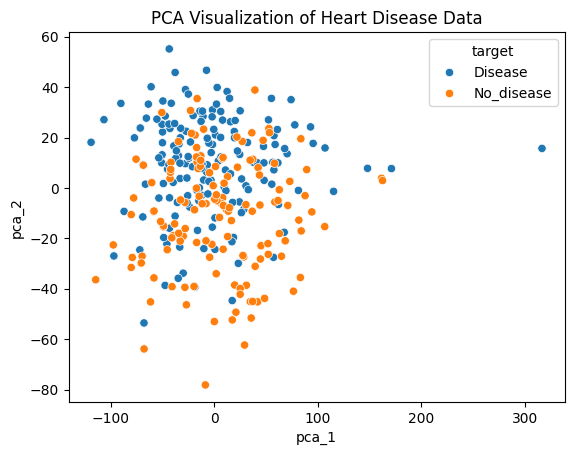

In [27]:
pca = PCA(n_components=2)
pca.fit(numeric_data)
pca_data = pca.transform(numeric_data)

# Create a DataFrame with the principal components and target labels
pca_df = pd.DataFrame({
    "pca_1": pca_data[:, 0],
    "pca_2": pca_data[:, 1],
    "target": data["target"]
})

# Visualize the PCA results with a scatter plot
sns.scatterplot(x="pca_1", y="pca_2", hue="target", data=pca_df)
plt.title("PCA Visualization of Heart Disease Data")
plt.show()


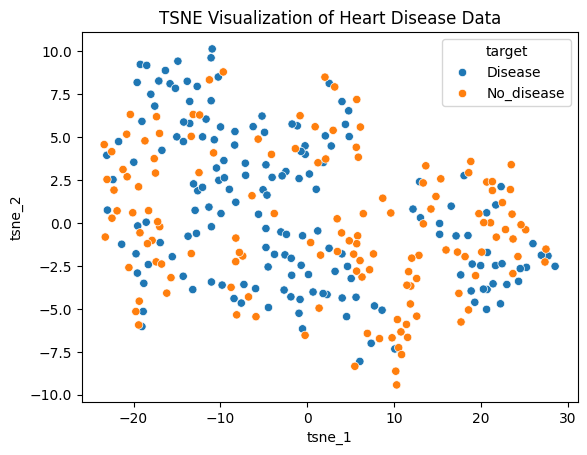

In [28]:
from sklearn.manifold import TSNE

# Initialize and fit the TSNE model
tsne = TSNE(n_components=2)
tsne_data = tsne.fit_transform(numeric_data)

# Create a DataFrame with the TSNE components and target labels
tsne_df = pd.DataFrame({
    "tsne_1": tsne_data[:, 0],
    "tsne_2": tsne_data[:, 1],
    "target": data["target"]
})

# Visualize the TSNE results with a scatter plot
sns.scatterplot(x="tsne_1", y="tsne_2", hue="target", data=tsne_df)
plt.title("TSNE Visualization of Heart Disease Data")
plt.show()


Based on the plots above, answer the following questions:    
1. What is the percentage of Samples with Disease?    
2. what are the 3 continous features that shows a singnficanct statistical differnce in distribution with respect to the precence and absence of the disease?    
3. Can we see a clear seperation in terms of the presence/absence of disease in the features obtained from pca and tsne plots?    
4. What is the optimal number of principal components in our case?    
5. what are the continous features with the highest correation with each other?

In [30]:
# Calculate percentage of samples with disease
disease_count = data['target'].value_counts()
disease_percentage = (disease_count["Disease"] / disease_count.sum()) * 100
print(f"Percentage of Samples with Disease: {disease_percentage:.4f}%")


Percentage of Samples with Disease: 54.4554%


**ANSWER 1:**

From the Pie chart provided and the calculations from bar chart, it can be said that the people's sample with disease is more than those without the disease. To be exact, the **sample% of people with disease= 54.4554%**

In [31]:
from scipy.stats import ttest_ind

# Perform t-test between disease and no disease groups for each continuous feature
continous_features = ['age', 'chol', 'thalach', 'oldpeak', 'trestbps']
for feature in continous_features:
    stat, pval = ttest_ind(data[data['target'] == 'Disease'][feature], data[data['target'] == 'No_disease'][feature])
    print(f'{feature}: p-value = {pval:.4f}')


age: p-value = 0.0001
chol: p-value = 0.1388
thalach: p-value = 0.0000
oldpeak: p-value = 0.0000
trestbps: p-value = 0.0115


**ANSWER 2:**

Looking at the box plots and pair plots, we can visually identify continuous features that show a clear separation between the disease and no disease groups:

Oldpeak (ST depression): There's a clear difference between the groups as it can be seen in the box plot.

Thalach (Maximum heart rate achieved): Higher heart rates are more likely to be present with that of heart disease.

Chol (Serum cholesterol): There seems to be some separation but less pronounced than the other two features.

The difference can be quantified by performing statistical tests like the t-test for each feature: **p-value < 0.05** typically indicates a statistically **significant difference between the two groups**.
A **p-value ≥ 0.05** suggests that there is **no statistically significant difference.**



***Groups with significant difference when associated with the heart disease from the output of the code are said to be:***

**Age** (p-value = 0.0001): age is an important factor for heart disease with a clear distinction between groups.

**Thalach** (Max Heart Rate) (p-value = 0.0000): individuals with heart disease have significantly different max heart rates compared to those without.

**Oldpeak** (ST Depression) (p-value = 0.0000): ST depression is highly associated with the presence of heart disease.

**Trestbps** (Resting Blood Pressure) (p-value = 0.0115): resting blood pressure shows some distinction between groups but is less pronounced than age, thalach, and oldpeak.

.

.

**Factors that maynot directly contribute to predict the presence of heart disease is:**

**Chol** (Cholesterol) (p-value = 0.1388):cholesterol does not strongly differentiate between heart disease and non-heart disease cases in this dataset.



**ANSWER 3:**

From the plots depicted above,

**PCA**:  seems to provide some separation, but it's not very distinct. The clusters for disease and no disease overlap to a considerable extent, indicating that PCA alone might not provide clear boundaries.

**t-SNE**: seems to show a slightly better separation compared to PCA. There is still some overlap, but t-SNE is generally better at capturing non-linear relationships, which explained the improved distinction between the disease and no disease groups.


**ANSWER 4:**

For this,  we need to check the **cumulative explained variance plot** from the PCA. The plot shows how much variance is explained by each additional principal component.
In PCA, the goal is to reduce the dimensionality of the data while retaining as much information (variance) as possible. The cumulative explained variance plot helps us decide the number of components needed by showing how much of the total variance is captured as we add more components.

**2 components** explain a significant portion of the variance, as shown by the curve flattening after these components.
This suggests that 2 principal components are sufficient to capture most of the important patterns in the data, making it the optimal number for dimensionality reduction in this context.

Based on the cumulative explained variance plot, the curve flattens around **3rd,4th components,** which explains around 90-95% of the total variance. Therefore, 3rd or 4th components would be considered optimal.

**ANSWER 5:**

From the heatmap showing the correlation matrix, we can identify which features have the strongest correlation. Based on the this:

**Trestbps** (Resting blood pressure) and **Chol** (Serum cholesterol) appear to have a **moderately positive correlation.**  This means that as resting blood pressure increases, cholesterol levels also tend to increase, but the relationship is not very strong.

**Thalach and Age** might have some **inverse correlation.** This indicates that younger participants tend to achieve higher maximum heart rates, while older participants tend to achieve lower maximum heart rates during physical activity.

***Age and Thalach*** : Correlation: -0.40
This is the strongest negative correlation in the matrix, indicating that as age increases, the maximum heart rate tends to decrease. This makes sense as older individuals generally have a lower heart rate capacity compared to younger ones.

***Age and Trestbps*** : Correlation: 0.28
There is a moderate positive correlation between age and resting blood pressure. As people age, their blood pressure tends to increase slightly, which is a known medical observation.

***Thalach and Oldpeak*** :
Correlation: -0.34
There is a moderate negative correlation between these two features, meaning that a higher maximum heart rate (thalach) tends to correspond with lower ST depression (oldpeak). This could be related to better cardiovascular fitness in those with higher heart rates during exercise.

**Chol and Trestbps**:
Correlation: 0.12 (low correlation)
This suggests that cholesterol levels and resting blood pressure do not have a strong linear relationship.

**Oldpeak and Age:**
Correlation: 0.21 (low to moderate correlation)
As age increases, ST depression tends to increase slightly, but the correlation is not very strong.

**The two most notable correlations are age and thalach (strongest negative correlation) and age and trestbps (moderate positive correlation).**

Now lets move on to do the same analysis on the starbucks nutrition dataset. this dataset contains the nutrition information of starbucks drinks.

In [34]:
upload2 = files.upload()

Saving star_nutri_expanded.csv to star_nutri_expanded.csv


In [35]:
data = pd.read_csv("star_nutri_expanded.csv")

In [36]:
data.head()

,Beverage_category,Beverage,Beverage_prep,Calories,Total Fat (g),Trans Fat (g),Saturated Fat (g),Sodium (mg),Total Carbohydrates (g),Cholesterol (mg),Dietary Fibre (g),Sugars (g),Protein (g),Vitamin A (% DV),Vitamin C (% DV),Calcium (% DV),Iron (% DV),Caffeine (mg)
0,Coffee,Brewed Coffee,Short,3,0.1,0.0,0.0,0,5,0,0,0,0.3,0%,0%,0%,0%,175
1,Coffee,Brewed Coffee,Tall,4,0.1,0.0,0.0,0,10,0,0,0,0.5,0%,0%,0%,0%,260
2,Coffee,Brewed Coffee,Grande,5,0.1,0.0,0.0,0,10,0,0,0,1.0,0%,0%,0%,0%,330
3,Coffee,Brewed Coffee,Venti,5,0.1,0.0,0.0,0,10,0,0,0,1.0,0%,0%,2%,0%,410
4,Classic Espresso Drinks,Caffè Latte,Short Nonfat Milk,70,0.1,0.1,0.0,5,75,10,0,9,6.0,10%,0%,20%,0%,75


cleaning and filling the missing values in the data

In [37]:
data['Caffeine (mg)'] = data['Caffeine (mg)'].replace('Varies', np.NaN).replace('varies', np.NaN)
data['Caffeine (mg)'] = data['Caffeine (mg)'].astype(np.float64)
data['Caffeine (mg)'] = data['Caffeine (mg)'].fillna(data['Caffeine (mg)'].mean())

In [38]:
data['Total Fat (g)'].unique()

array(['0.1', '3.5', '2.5', '0.2', '6', '4.5', '0.3', '7', '5', '0.4',
       '9', '1.5', '4', '2', '8', '3', '11', '0', '1', '10', '15', '13',
       '0.5', '3 2'], dtype=object)

In [39]:
data['Total Fat (g)'] = data['Total Fat (g)'].replace('3 2', '3.2')

In [40]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242 entries, 0 to 241
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Beverage_category        242 non-null    object 
 1   Beverage                 242 non-null    object 
 2   Beverage_prep            242 non-null    object 
 3   Calories                 242 non-null    int64  
 4   Total Fat (g)            242 non-null    object 
 5   Trans Fat (g)            242 non-null    float64
 6   Saturated Fat (g)        242 non-null    float64
 7   Sodium (mg)              242 non-null    int64  
 8   Total Carbohydrates (g)  242 non-null    int64  
 9   Cholesterol (mg)         242 non-null    int64  
 10  Dietary Fibre (g)        242 non-null    int64  
 11  Sugars (g)               242 non-null    int64  
 12  Protein (g)              242 non-null    float64
 13  Vitamin A (% DV)         242 non-null    object 
 14  Vitamin C (% DV)         2

In [41]:
# Extract columns with int and float types
numeric_columns = data.select_dtypes(include=["int64", "float64"]).columns

# Print the numeric columns
print(numeric_columns)


Index(['Calories', 'Trans Fat (g)', 'Saturated Fat (g)', 'Sodium (mg)',
       'Total Carbohydrates (g)', 'Cholesterol (mg)', 'Dietary Fibre (g)',
       'Sugars (g)', 'Protein (g)', 'Caffeine (mg)'],
      dtype='object')


We will be analysing the dataset using the fact that weather the drink comes under the category tea or not

In [42]:
data['Beverage_category'].unique()

array(['Coffee', 'Classic Espresso Drinks', 'Signature Espresso Drinks',
       'Tazo® Tea Drinks', 'Shaken Iced Beverages', 'Smoothies',
       'Frappuccino® Blended Coffee', 'Frappuccino® Light Blended Coffee',
       'Frappuccino® Blended Crème'], dtype=object)

In [43]:
data['Tea'] = data['Beverage_category'].apply(lambda x: 1 if x == 'Tazo® Tea Drinks' else 0)
data = data.drop('Beverage_category', axis=1)

In [44]:
##  one hot encoding of categorical features in data
def onehot_encode(df, columns, prefixes):
    df = df.copy()
    for column, prefix in zip(columns, prefixes):
        dummies = pd.get_dummies(df[column], prefix=prefix)
        df = pd.concat([df, dummies], axis=1)
        df = df.drop(column, axis=1)
    return df

In [45]:
data = onehot_encode(
    data,
    columns=['Beverage', 'Beverage_prep'],
    prefixes=['bev', 'bevp']
)

In [46]:

data = data.replace({True: 1, False: 0})


<ipython-input-46-7a01f9f40121>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data = data.replace({True: 1, False: 0})


In [47]:
data = data.applymap(lambda x: np.float64(str(x).replace('%', '')))

<ipython-input-47-4d863302f14a>:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  data = data.applymap(lambda x: np.float64(str(x).replace('%', '')))


In [48]:
data.head()

,Calories,Total Fat (g),Trans Fat (g),Saturated Fat (g),Sodium (mg),Total Carbohydrates (g),Cholesterol (mg),Dietary Fibre (g),Sugars (g),Protein (g),...,bevp_Grande Nonfat Milk,bevp_Short,bevp_Short Nonfat Milk,bevp_Solo,bevp_Soymilk,bevp_Tall,bevp_Tall Nonfat Milk,bevp_Venti,bevp_Venti Nonfat Milk,bevp_Whole Milk
0,3.0,0.1,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.3,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,4.0,0.1,0.0,0.0,0.0,10.0,0.0,0.0,0.0,0.5,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,5.0,0.1,0.0,0.0,0.0,10.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,5.0,0.1,0.0,0.0,0.0,10.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,70.0,0.1,0.1,0.0,5.0,75.0,10.0,0.0,9.0,6.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [49]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242 entries, 0 to 241
Data columns (total 62 columns):
 #   Column                                                   Non-Null Count  Dtype  
---  ------                                                   --------------  -----  
 0   Calories                                                 242 non-null    float64
 1   Total Fat (g)                                            242 non-null    float64
 2   Trans Fat (g)                                            242 non-null    float64
 3   Saturated Fat (g)                                        242 non-null    float64
 4   Sodium (mg)                                              242 non-null    float64
 5   Total Carbohydrates (g)                                  242 non-null    float64
 6   Cholesterol (mg)                                         242 non-null    float64
 7   Dietary Fibre (g)                                        242 non-null    float64
 8   Sugars (g)                    

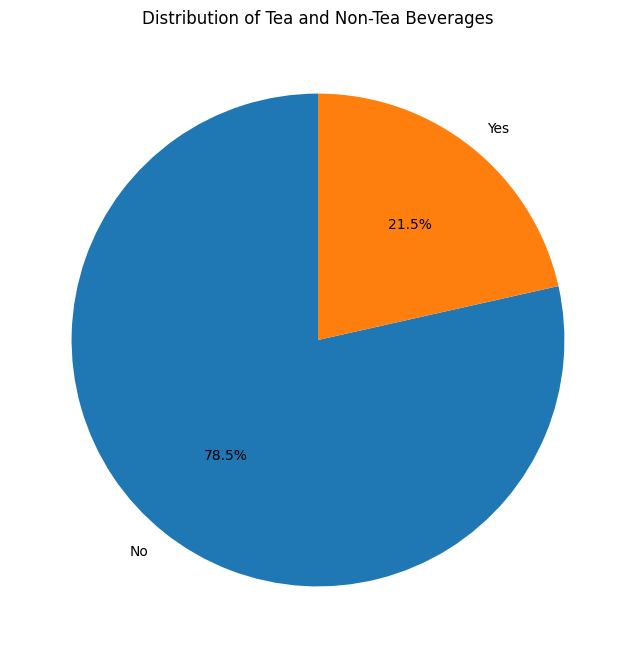

In [52]:
## to do

# Create a pie chart of the 'Tea' column also write your observation form the plot
plt.figure(figsize=(8, 8))
plt.pie(data['Tea'].value_counts(), labels=['No', 'Yes'], autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Tea and Non-Tea Beverages')
plt.show()


The majority of the beverages in the dataset are non-tea drinks, constituting 78.5% of the total samples. This suggests that non-tea beverages are more prevalent in this dataset.

Conversely, tea beverages account for only 21.5% of the samples, indicating that they are less common in comparison to non-tea drinks.

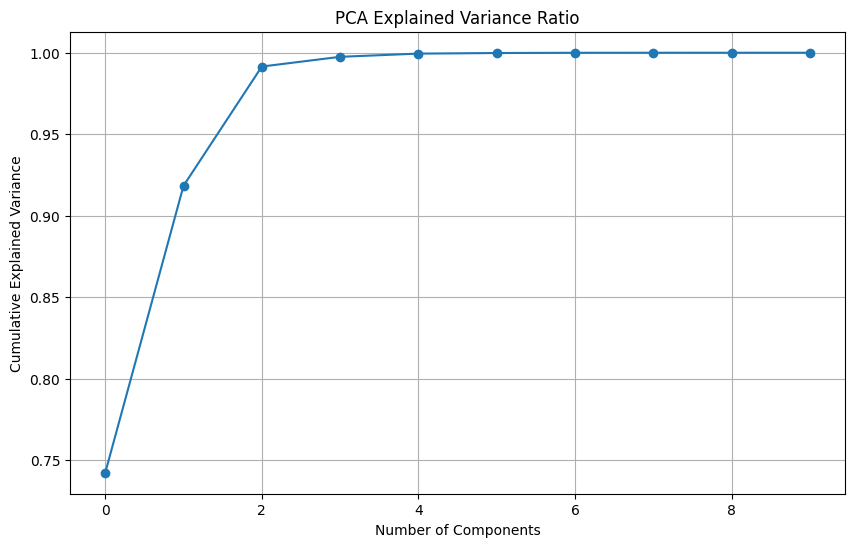

In [61]:
# perform pca on the data and plot the explained variace ratio, what is the optimal number of principal components in this case ?
## to do
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

# Preparing the data for PCA (only using numeric data)
pca_data = data[numeric_columns]  # Assuming numeric_columns have been defined earlier
pca = PCA()
pca.fit(pca_data)

# Plotting the cumulative explained variance
plt.figure(figsize=(10, 6))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('PCA Explained Variance Ratio')
plt.grid()
plt.show()




The plot shows how much of the total variance in the data is explained by each additional principal component.
We can see that after adding the **third principal component**, there is a significant increase in the cumulative explained variance. However, *adding more components beyond this point doesn't lead to a substantial increase* in explained variance. This suggests that the first three components capture most of the important information in the data.

Therefore, using 3 principal components in this case would be a reasonable choice, as it provides a good balance between dimensionality reduction and preserving the most important information in the data.
But 2 principle components also gives the best result as optimal under these circumstances.

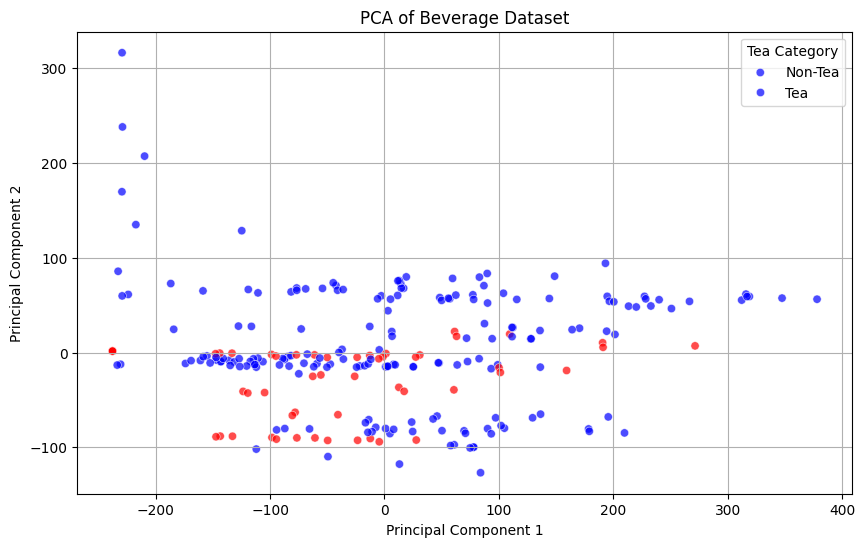

In [70]:
## to do
# visualise the principal components, choose the number of principal components based on the above plot. What is you observation from the plot?
# Choose the number of components based on the explained variance plot
optimal_components = 2  # Assuming 2 components based on the previous analysis
pca = PCA(n_components=optimal_components)
pca_data = pca.fit_transform(pca_data)

# Create a DataFrame for the principal components
pca_df = pd.DataFrame(data=pca_data, columns=[f'PC{i + 1}' for i in range(optimal_components)])
pca_df['Tea'] = data['Tea'].values  # Adding the target variable

# Plotting the first two principal components with specified colors
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PC1', y='PC2', hue='Tea', data=pca_df, palette=['blue', 'red'], alpha=0.7)
plt.title('PCA of Beverage Dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Tea Category', loc='upper right', labels=['Non-Tea', 'Tea'])  # Customize legend labels
plt.grid()
plt.show()


 The tea and non-tea samples tend to cluster in distinct regions of the plot, suggesting that the first two principal components capture some of the variation between these two categories.

 There is also some variation within each category, as evidenced by the spread of points within each cluster. This indicates that other factors besides the tea/non-tea distinction contribute to the variation in the beverage data.

 The first principal component appears to be more important than the second, as it explains a larger amount of the total variance in the data. This can be inferred from the fact that the points are more spread out along the x-axis than the y-axis.

 The scatter plot helps visualize how tea and non-tea beverages are distributed in the PCA space.
A clear separation indicates that the features effectively differentiate between tea and non-tea drinks.

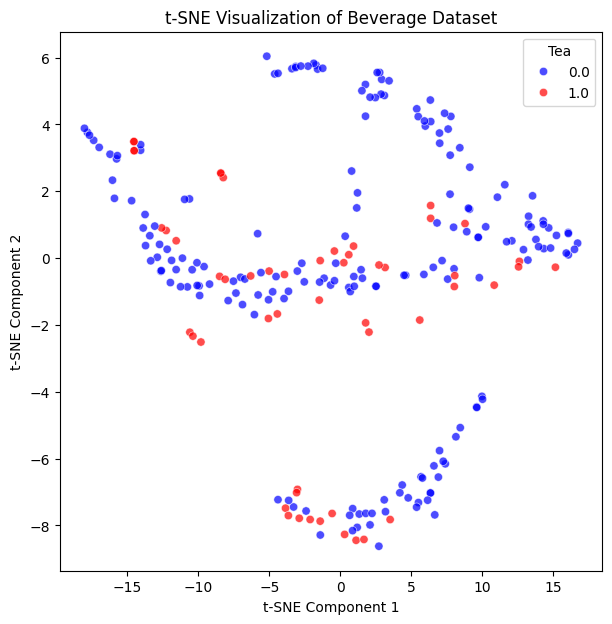

In [79]:
## to do
# plot the first 2 components of tsne, whats you observation from the plot?
from sklearn.manifold import TSNE

# Initialize and fit the t-SNE model
tsne = TSNE(n_components=2)
tsne_data = tsne.fit_transform(pca_data)  # Using the PCA-transformed data

# Create a DataFrame for the t-SNE components
tsne_df = pd.DataFrame(data=tsne_data, columns=['TSNE1', 'TSNE2'])
tsne_df['Tea'] = data['Tea'].values  # Adding the target variable

# Plotting the t-SNE results
plt.figure(figsize=(7, 7))
sns.scatterplot(x='TSNE1', y='TSNE2', hue='Tea', data=tsne_df, palette=['blue', 'red'], alpha=0.7)
plt.title('t-SNE Visualization of Beverage Dataset')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')

plt.show()





t-SNE (t-distributed Stochastic Neighbor Embedding) is a technique used for visualizing high-dimensional data by reducing it to two or three dimensions. The different colors represent different clusters or classes within the dataset.


The plot shows how different points (data samples) are grouped in two dimensions. Clusters represent groups of drinks with similar characteristics.

The t-SNE plot seems to reveal some distinct clusters, meaning that there may be natural groupings in the dataset.

The clustering pattern suggests that tea-based beverages may form a separate cluster from other beverage categories, indicating a clear distinction between these groups.
However, some overlap between points indicates that certain features might not separate the groups completely.

*The points in the t-SNE plot are grouped into **distinct clusters**, indicating that there are different categories or types of beverages present in the dataset.*

These clusters suggest that beverages with similar characteristics (such as ingredients, nutritional content, or flavor profiles) are located closer together in the 2D representation.

The **red and blue points** represent different classes or clusters, and some clear separation between these clusters is visible, suggesting well-defined groupings in the data.
Different colored points likely represent various beverage types (e.g., tea vs. non-tea drinks).
**Some clusters appear denser** than others, which could indicate a higher number of similar beverages within those categories.

For example, if a cluster is very dense, it may suggest that there are many variations of a specific type of drink that share common features. **In this case, Non-tea drinks are preferred more than the Tea drinks.**

There are **points that are isolated from the main clusters**, representing outlier beverages that may have unique attributes.
These outliers could correspond to beverages with extreme values in certain features (e.g., high caffeine content or low calories).


The **separation between clusters in the t-SNE plot suggests that the underlying features used in the analysis** are effective in distinguishing between different types of beverages.
The distinct visual separation allows for easy identification of groups that could be further analyzed for marketing or product development purposes.


**Points that are closer** together in the t-SNE space indicate that the corresponding beverages are **more similar in terms of the feature**s considered in the dataset.
Conversely, points that are far apart suggest significant differences in the attributes of those beverages.






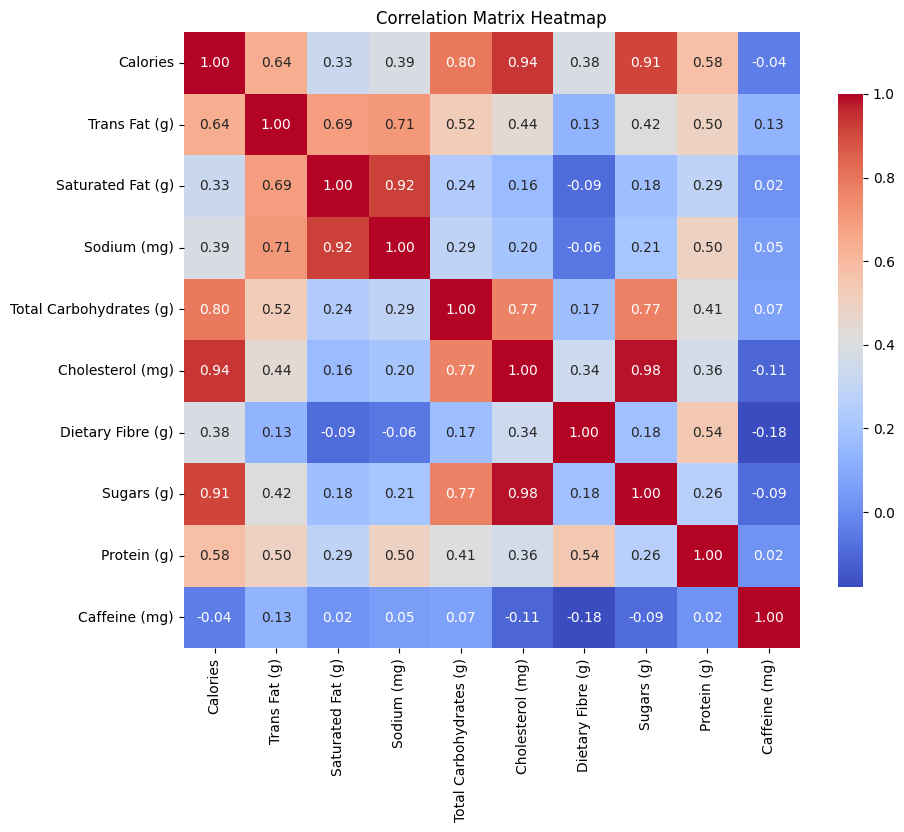

In [80]:
## to do
# create a correlation matrix and plot the heatmap, whats your observation from the heatmap ?
corr_matrix = data[numeric_columns].corr()

# Plotting the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
plt.title('Correlation Matrix Heatmap')
plt.show()


Some features have high correlations, which might indicate redundancy or multicollinearity (e.g., if two features provide the same information).

**Positive correlations** are seen between features like "Calories" and "Sodium" or "Total Carbohydrates" and "Sugar." These correlations suggest that certain types of drinks that are higher in calories tend to have higher amounts of sodium, carbohydrates, and sugars.

The features "**Caffeine" and "Fat"** appear to have **weak correlations** with most of the other features, indicating they may provide unique information.

***1. Calories vs. Total Fat, Sugars, and Total Carbohydrates:***

**Strong Positive Correlation:**
Calories have a high correlation with Total Fat, Sugars, and Total Carbohydrates (near or above 0.9). These features are tightly linked, which makes sense as higher-fat or higher-sugar drinks tend to be more calorie-dense.




***2. Sugars vs. Total Carbohydrates:***

**High Correlation** (~1.0):
This almost perfect correlation suggests that most of the carbohydrates in the drinks are coming from sugars. This relationship could indicate redundancy, meaning one of these features may not contribute much new information in a predictive model since they are so closely related.


***3. Cholesterol and Protein:***

**Weak Correlations:** Cholesterol and Protein have weak correlations with most other features in the dataset (close to 0 or slightly negative values).
 Cholesterol and Protein are relatively independent and don’t strongly influence other features like calories, fat, or sugars.


***4. Caffeine vs. Other Features:***

**Weak to Moderate Correlation:** Caffeine shows a weak to moderate negative correlation with some features, such as Calories and Sugars. Caffeine content doesn’t seem to have a strong relationship with caloric content or macronutrients in the dataset.




***5. Sodium vs. Other Features:***

**Moderate Correlation:** Sodium is moderately correlated with features like Calories and Sugars but not as strongly as the Total Fat or Total Carbohydrates.
 Sodium’s contribution may be linked to other factors (like flavor enhancers) but is not a major driving factor compared to calories or sugars.


**Redundant Features**: High correlations between Calories, Sugars, and Total Carbohydrates suggest potential redundancy in the dataset. We consider removing one of these in feature selection or during dimensionality reduction (like PCA).

***Distinct Features:*** Protein, Cholesterol, and Caffeine have weaker correlations with other features, meaning they could add unique information to any analysis or predictive models.

***Key Drivers:*** Calories, Sugars, and Total Fat are key features driving the dataset's structure, based on their strong inter-correlations.



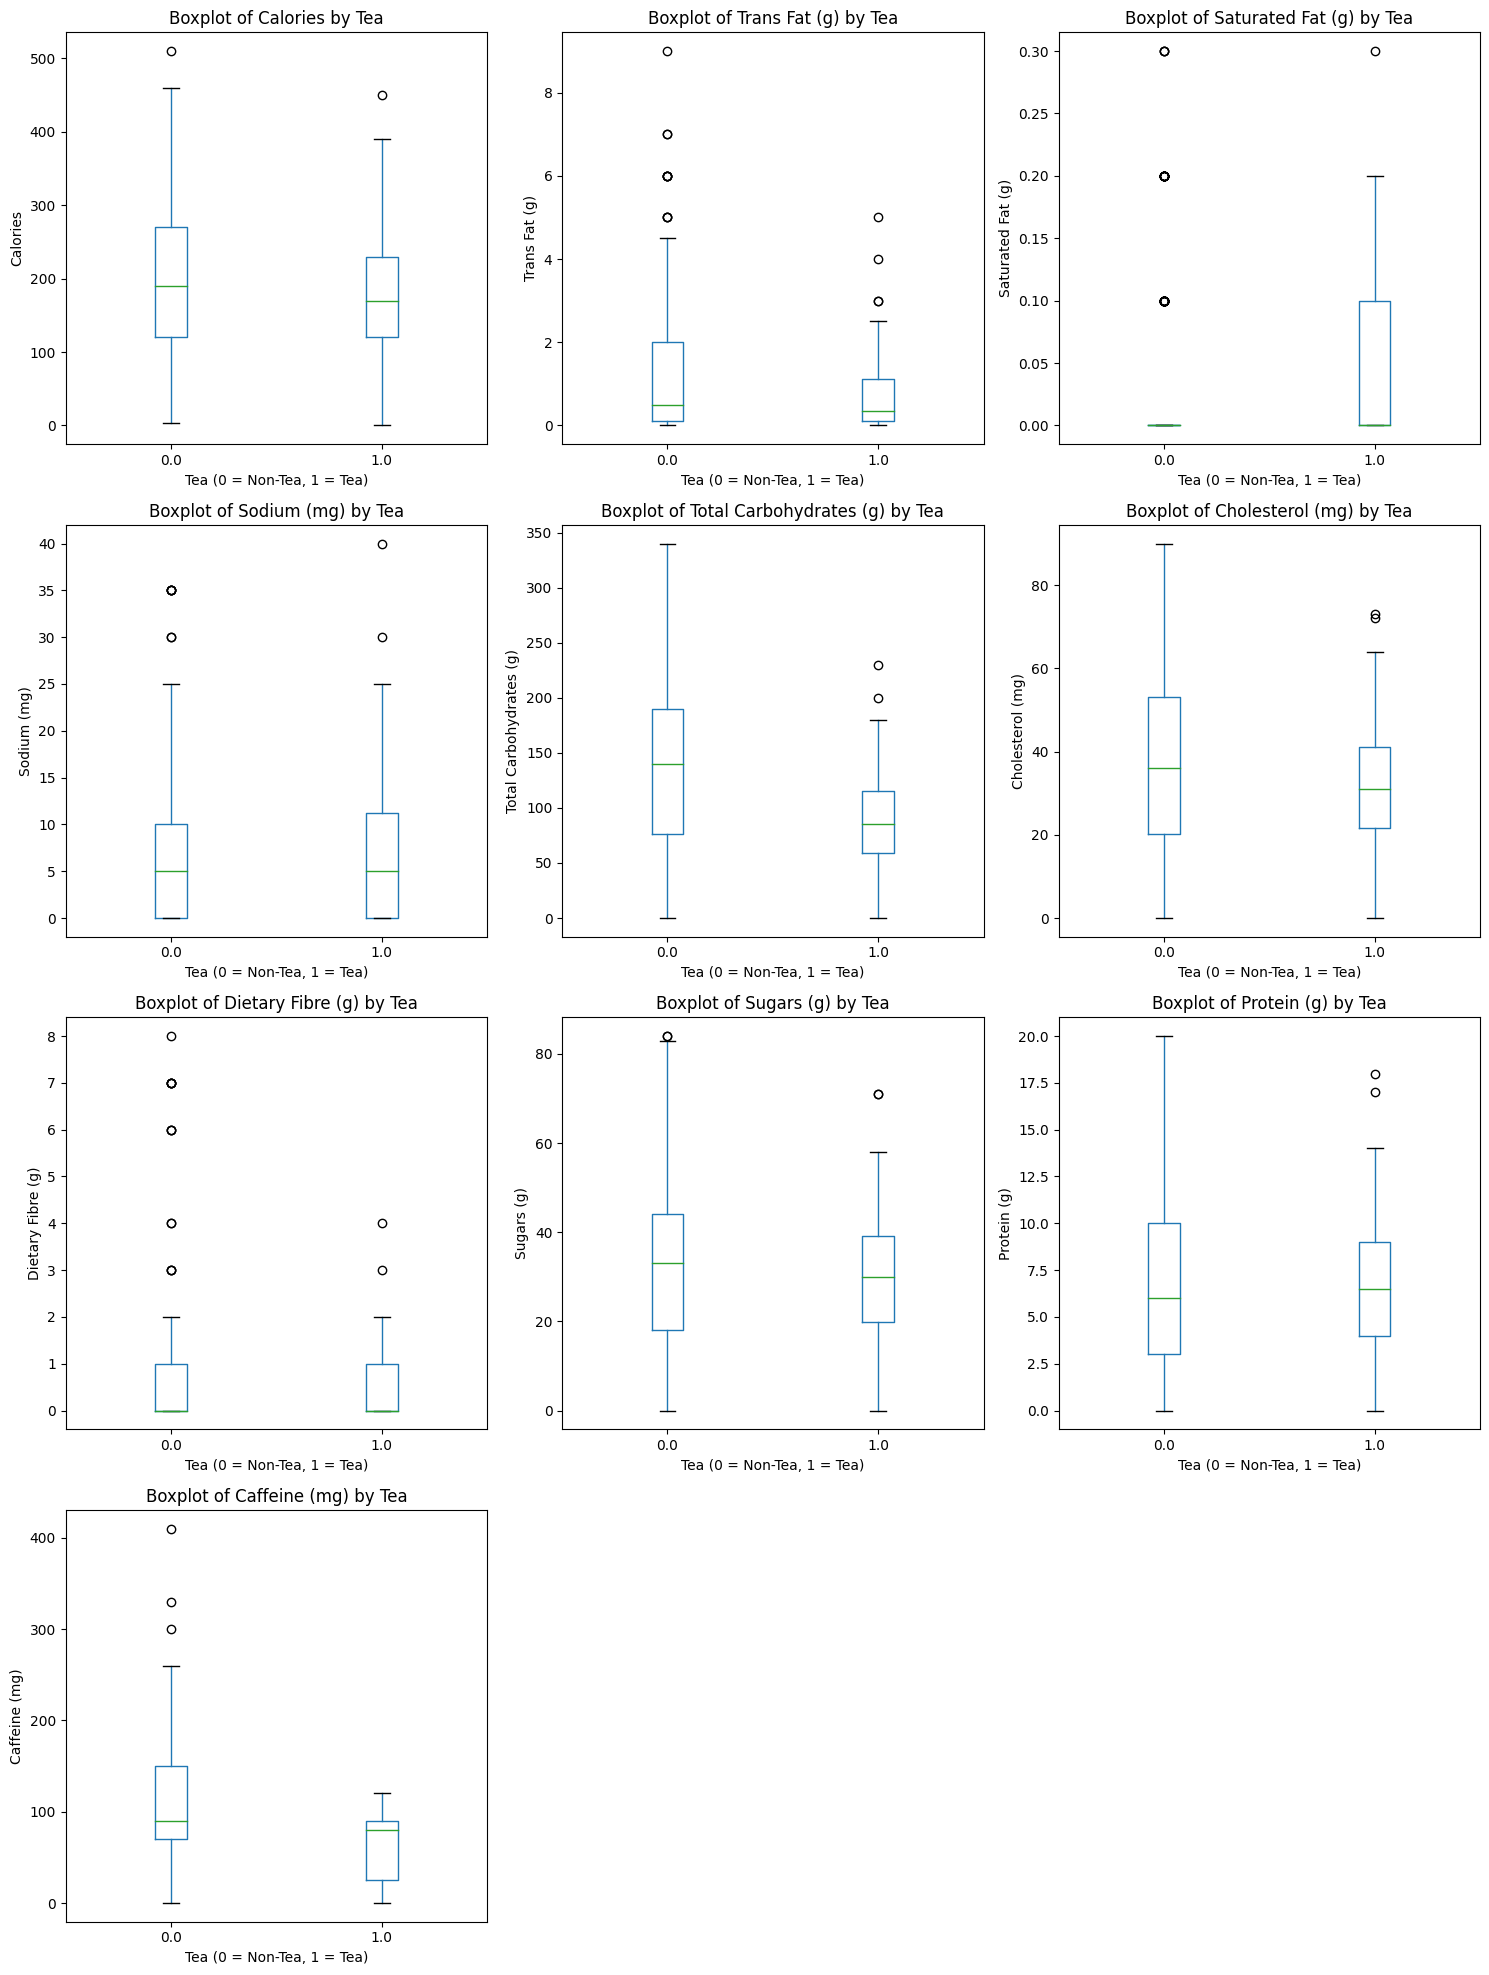

In [84]:
## to do
# make a boxplot of all the numeric columns of the dataset. Which column/columns can be the most potential indicator weather its a tea or a non tea drink?
import matplotlib.pyplot as plt

# Set the number of subplots to display
num_plots = len(numeric_columns)
cols = 3  # Number of columns for subplots
rows = (num_plots // cols) + (num_plots % cols > 0)  # Calculate the number of rows needed

# Create subplots
fig, axes = plt.subplots(rows, cols, figsize=(15, 5 * rows))
axes = axes.flatten()  # Flatten the axes array for easy iteration

# Create boxplots for each numeric feature, grouped by 'Tea'
for idx, column in enumerate(numeric_columns):
    data.boxplot(column=column, by='Tea', ax=axes[idx], grid=False)
    axes[idx].set_title(f'Boxplot of {column} by Tea')
    axes[idx].set_ylabel(column)
    axes[idx].set_xlabel('Tea (0 = Non-Tea, 1 = Tea)')

# Hide any unused subplots
for j in range(idx + 1, len(axes)):
    axes[j].axis('off')

plt.suptitle('')  # Suppress the default title to avoid overlapping
plt.tight_layout()
plt.show()



Boxplots are used to visually assess the distribution of data for each numeric feature. They depict the median, quartiles, and potential outliers.

The median value for each feature is marked by the central line in each box, showing the central tendency.

The boxes represent the interquartile range (IQR), and any points outside this range are considered outliers (shown as individual points).

Some features exhibit significant outliers, while others have more tightly clustered values.

This helps identify features with potential skewness, outliers, and differences in scale.

The boxplots in this represent the distribution of several numeric columns in the dataset, categorized by whether the drink is tea or non-tea (indicated by 0 and 1, respectively). These visualizations can help identify which features differentiate tea from non-tea drinks.

**1. Calories** Observation: Non-tea drinks (0) generally have higher calories than tea drinks (1). Hence, Calories could be a strong indicator of whether a drink is tea or not, as tea drinks tend to have fewer calories on average.

**2. Total Fat (g)** Observation: Non-tea drinks have a wider range of total fat values, while tea drinks generally have lower fat content, with many tea drinks having almost no fat. Hence, Fat content might also be an indicator, as many tea drinks have negligible fat compared to non-tea drinks.

**3. Sodium (mg)** Observation: There is more variation in sodium content for non-tea drinks, with a higher median sodium level. Tea drinks generally have lower sodium. Hence, Sodium levels can be another potential indicator, although the difference between tea and non-tea drinks is less pronounced than calories or fat.

**4. Total Carbohydrates (g)** Observation: Non-tea drinks exhibit a wider range of carbohydrates, while tea drinks tend to have lower carbohydrate content. Hence,  Like fat and sodium, total carbohydrates can also differentiate tea and non-tea drinks, with non-tea drinks typically having higher carbohydrate content.

**5. Cholesterol (mg)** Observation: Non-tea drinks have a broader range of cholesterol values, with higher cholesterol content compared to tea drinks, which mostly have little or no cholesterol. Hence, Cholesterol levels could serve as a distinguishing feature, especially since many tea drinks have zero cholesterol.


**6. Sugars (g)** Observation: Non-tea drinks generally have higher sugar content than tea drinks, although there is some overlap. Hence, Sugars could be a good differentiating factor, as non-tea drinks tend to have more sugar on average.


**7. Protein (g)** Observation: There is a wider range of protein content in non-tea drinks, while tea drinks have lower protein values. Hence, Protein could be another indicator, with non-tea drinks having higher protein content.


**8. Caffeine (mg)** Observation: Non-tea drinks have a wider distribution of caffeine levels, with a higher median compared to tea drinks, which generally have lower caffeine levels. Hence, Caffeine could be a good indicator for distinguishing between tea and non-tea drinks, but the overlap in caffeine levels between both categories indicates that it may not be as strong a differentiator as calories or fat.

***Strong Indicators:*** Calories, Total Fat, Cholesterol, and Sugars seem to be strong indicators of whether a drink is tea or non-tea, as these features show significant differences between the two categories.

***Moderate Indicators:*** Sodium, Protein, and Total Carbohydrates show some differences, but with more overlap between tea and non-tea drinks, making them less definitive indicators.

***Weaker Indicators:*** Caffeine is the least strong indicator due to the overlap in caffeine levels between tea and non-tea drinks.




To enhance the clarity and professionalism of the provided text, consider the following refined version: In the process of conducting a preliminary Exploratory Data Analysis (EDA), we have utilized various techniques to gain insights into the datasets under consideration. It's important to note that our analysis extends beyond the initial visualizations, embracing a multitude of methods to thoroughly understand the data.
Among the array of tools available for EDA, one particularly easy solution is the use of the pandas profiling library. This tool significantly simplifies the process of exploring the fundamental distribution of data within a dataset. By generating detailed profile reports, pandas profiling provides a comprehensive overview of the dataset's characteristics, including but not limited to, the distribution of variables, presence of missing values, and potential correlations between variables.
Furthermore, we are utilizing Google Colab notebooks, the integration of AI tools offers an additional avenue for data visualization and analysis. These tools can automatically generate insightful plots and statistics, further enriching the data exploration process.